##### Instrukcja jak uruchamiac poszczególne komórki oraz jakich instalacji potrzebujemy.
###### Niniejszy notatnik jest przygotowany by można było go uruchomic w środowisku lokalnym i na Google Colab


### Niezbędne instalacje ###
##### Nim uruchomisz instalacje uruchom import i sprawdzenie wersji wtyczek jeśli będzie bład wróc i odpal instalacje

In [ ]:
pip install --upgrade pip

In [ ]:
pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [ ]:
pip install --user scikit-learn opencv-python tensorflow

### Importy 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import cv2
import os
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from platform import python_version


#### Sprawdzamy wersję zainstalowanych wtyczek 

In [5]:
print("Python version: ",python_version()) 
print("Numpy version: ",np. __version__) 
print("Patplotlib version: ",mlt. __version__) 
print("Opencv version: ",cv2. __version__) 
print("Pandas version: ",pd. __version__) 
print("Tensorflow version: ",tf. __version__)


Python version:  3.8.8
Numpy version:  1.22.4
Patplotlib version:  3.5.2
Opencv version:  4.6.0
Pandas version:  1.4.3
Tensorflow version:  2.9.0-dev20220316


### Uruchomiać tylko dla treningu w google colab
> #### 1. Podłączamy swój dysk goole 
> #### 2. W kolejnym kroku należy podac dokładną ścieżkę do katalogu MyData i do pliku labels edytując wpis w (patch; labelsFiles) 









In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
from google.colab.patches import cv2_imshow

################# Parameters for Google Colab #####################

path = "drive/MyDrive/myData/myData"  # folder with all the class folders
labelFile = 'drive/MyDrive/labels.csv'  # file with all names of classes
batch_size_val = 50 # how many to process together
epochs_val = 30 # how many epochs
imageDimesions = (32, 32, 3)
testRatio = 0.2  # if 1000 images split will 200 for testing
validationRatio = 0.2  # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################

### Uruchamiamy tylko na komputerze lokalnym 
> #### 1. W kolejnym kroku należy podac dokładną ścieżkę do katalogu MyData i do pliku labels edytując wpis w (patch; labelsFiles) 

In [6]:
################# Parameters for local machine #####################
path = "c:/Users/Stranger_inc/Downloads/!!!PROJEKT!!!/myData2"  # folder with all the class folders
labelFile = 'c:/Users/Stranger_inc/Downloads/!!!PROJEKT!!!/labels.csv'  # file with all names of classes
batch_size_val = 50 # how many to process together
epochs_val = 30 # how many epochs
imageDimesions = (32, 32, 3)  #ustalamy rozmiary obrazka
testRatio = 0.2  # if 1000 images split will 200 for testing
validationRatio = 0.2  # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################

 Importing of the Images (Import obrazów)

In [7]:
############################### Importing of the Images
count = 0  # 0 uzyjemy jako katalogu startowego i bedziemy go zwiększać o kolejną wczytaną klasę
images = []   # lista obrazków
classNo = []  # lista wszystkich naszych klass
myList = os.listdir(path)  # Return a list containing the names of the files in the directory.
print("Ilość wykrytych klas:", len(myList))  # długść listy na podstawie zawartości katalogu
noOfClasses = len(myList)  # do ilości klas przypisuję zmienną noOfClasses
print("Importing Klas.....")
for x in range(0, len(myList)):  # pętla która ma za zadanie wczytanie kolejnych katalogów z danymi
    myPicList = os.listdir(path + "/" + str(count))  # patch podaje dostęp do katalogu MyData count podstawia  nr kolejnego katalogu
    for y in myPicList:  # pętla w pętli  wczytujaca zawartośc poszczególnych katalogów w MyData
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)  # Wczytujemy kolejne obrazki z MyData
        images.append(curImg)   #
        classNo.append(count)   # zwiększamy listę klas o kolejną klasę
    print(count, end=" ")
    count += 1   # zwiększamy count o 1 co spowoduje przejście do kolejnego katalogu
print(" ")
images = np.array(images)  # budujemy macierz z oobrazkami
classNo = np.array(classNo)  # budujemy macierz z klasami


Ilość wykrytych klas: 43
Importing Klas.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


Split Data (Podział danych na zbiór treningowy, testowy i walidacyjny)

In [8]:
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
# Image_train = ARRAY OF IMAGES TO TRAIN
# label_train = CORRESPONDING CLASS ID


To check if number of images matches to number of labels for each data set (Sprawdzamy czy liczba obrazów jest zgodna z liczbą etykiet dla każdego zbioru danych)

In [9]:
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print('All Data Sets:', len(images))
print("Train Data:", end="");
print(X_train.shape, y_train.shape)
print("Validation Data: ", end="");
print(X_validation.shape, y_validation.shape)
print("Test Data: ", end="");
print(X_test.shape, y_test.shape)
assert (X_train.shape[0] == y_train.shape[0]), "Liczba obrazów nie jest równa liczbie etykiet w zestawie uczącym"
assert (X_validation.shape[0] == y_validation.shape[0]), "Liczba obrazów nie jest równa liczbie etykiet w zestawie walidacyjnym"
assert (X_test.shape[0] == y_test.shape[0]), "Liczba obrazów nie jest równa liczbie etykiet w zestawie testowym"
assert (X_train.shape[1:] == (imageDimesions)), " Wymiary obrazów szkoleniowych są nieprawidłowe"
assert (X_validation.shape[1:] == (imageDimesions)), " Wymiary obrazów walidacji są nieprawidłowe "
assert (X_test.shape[1:] == (imageDimesions)), "Wymiary obrazów testowych są nieprawidłowe "


Data Shapes
All Data Sets: 107787
Train Data:(68983, 32, 32, 3) (68983,)
Validation Data: (17246, 32, 32, 3) (17246,)
Test Data: (21558, 32, 32, 3) (21558,)


### Read csv file (Wczytanie pliku z etykietami)

In [10]:
############################### READ CSV FILE
data = pd.read_csv(labelFile)  # we read our labels
print("data shape ", data.shape, type(data))  # Wyświetlamy jak wygląda nasz Label files ( ile zawiera klas i ile obiektów)


data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


### Display some samples images of all the classes (Wyświetlenie niektórych próbek zdjęć wszystkich klas)

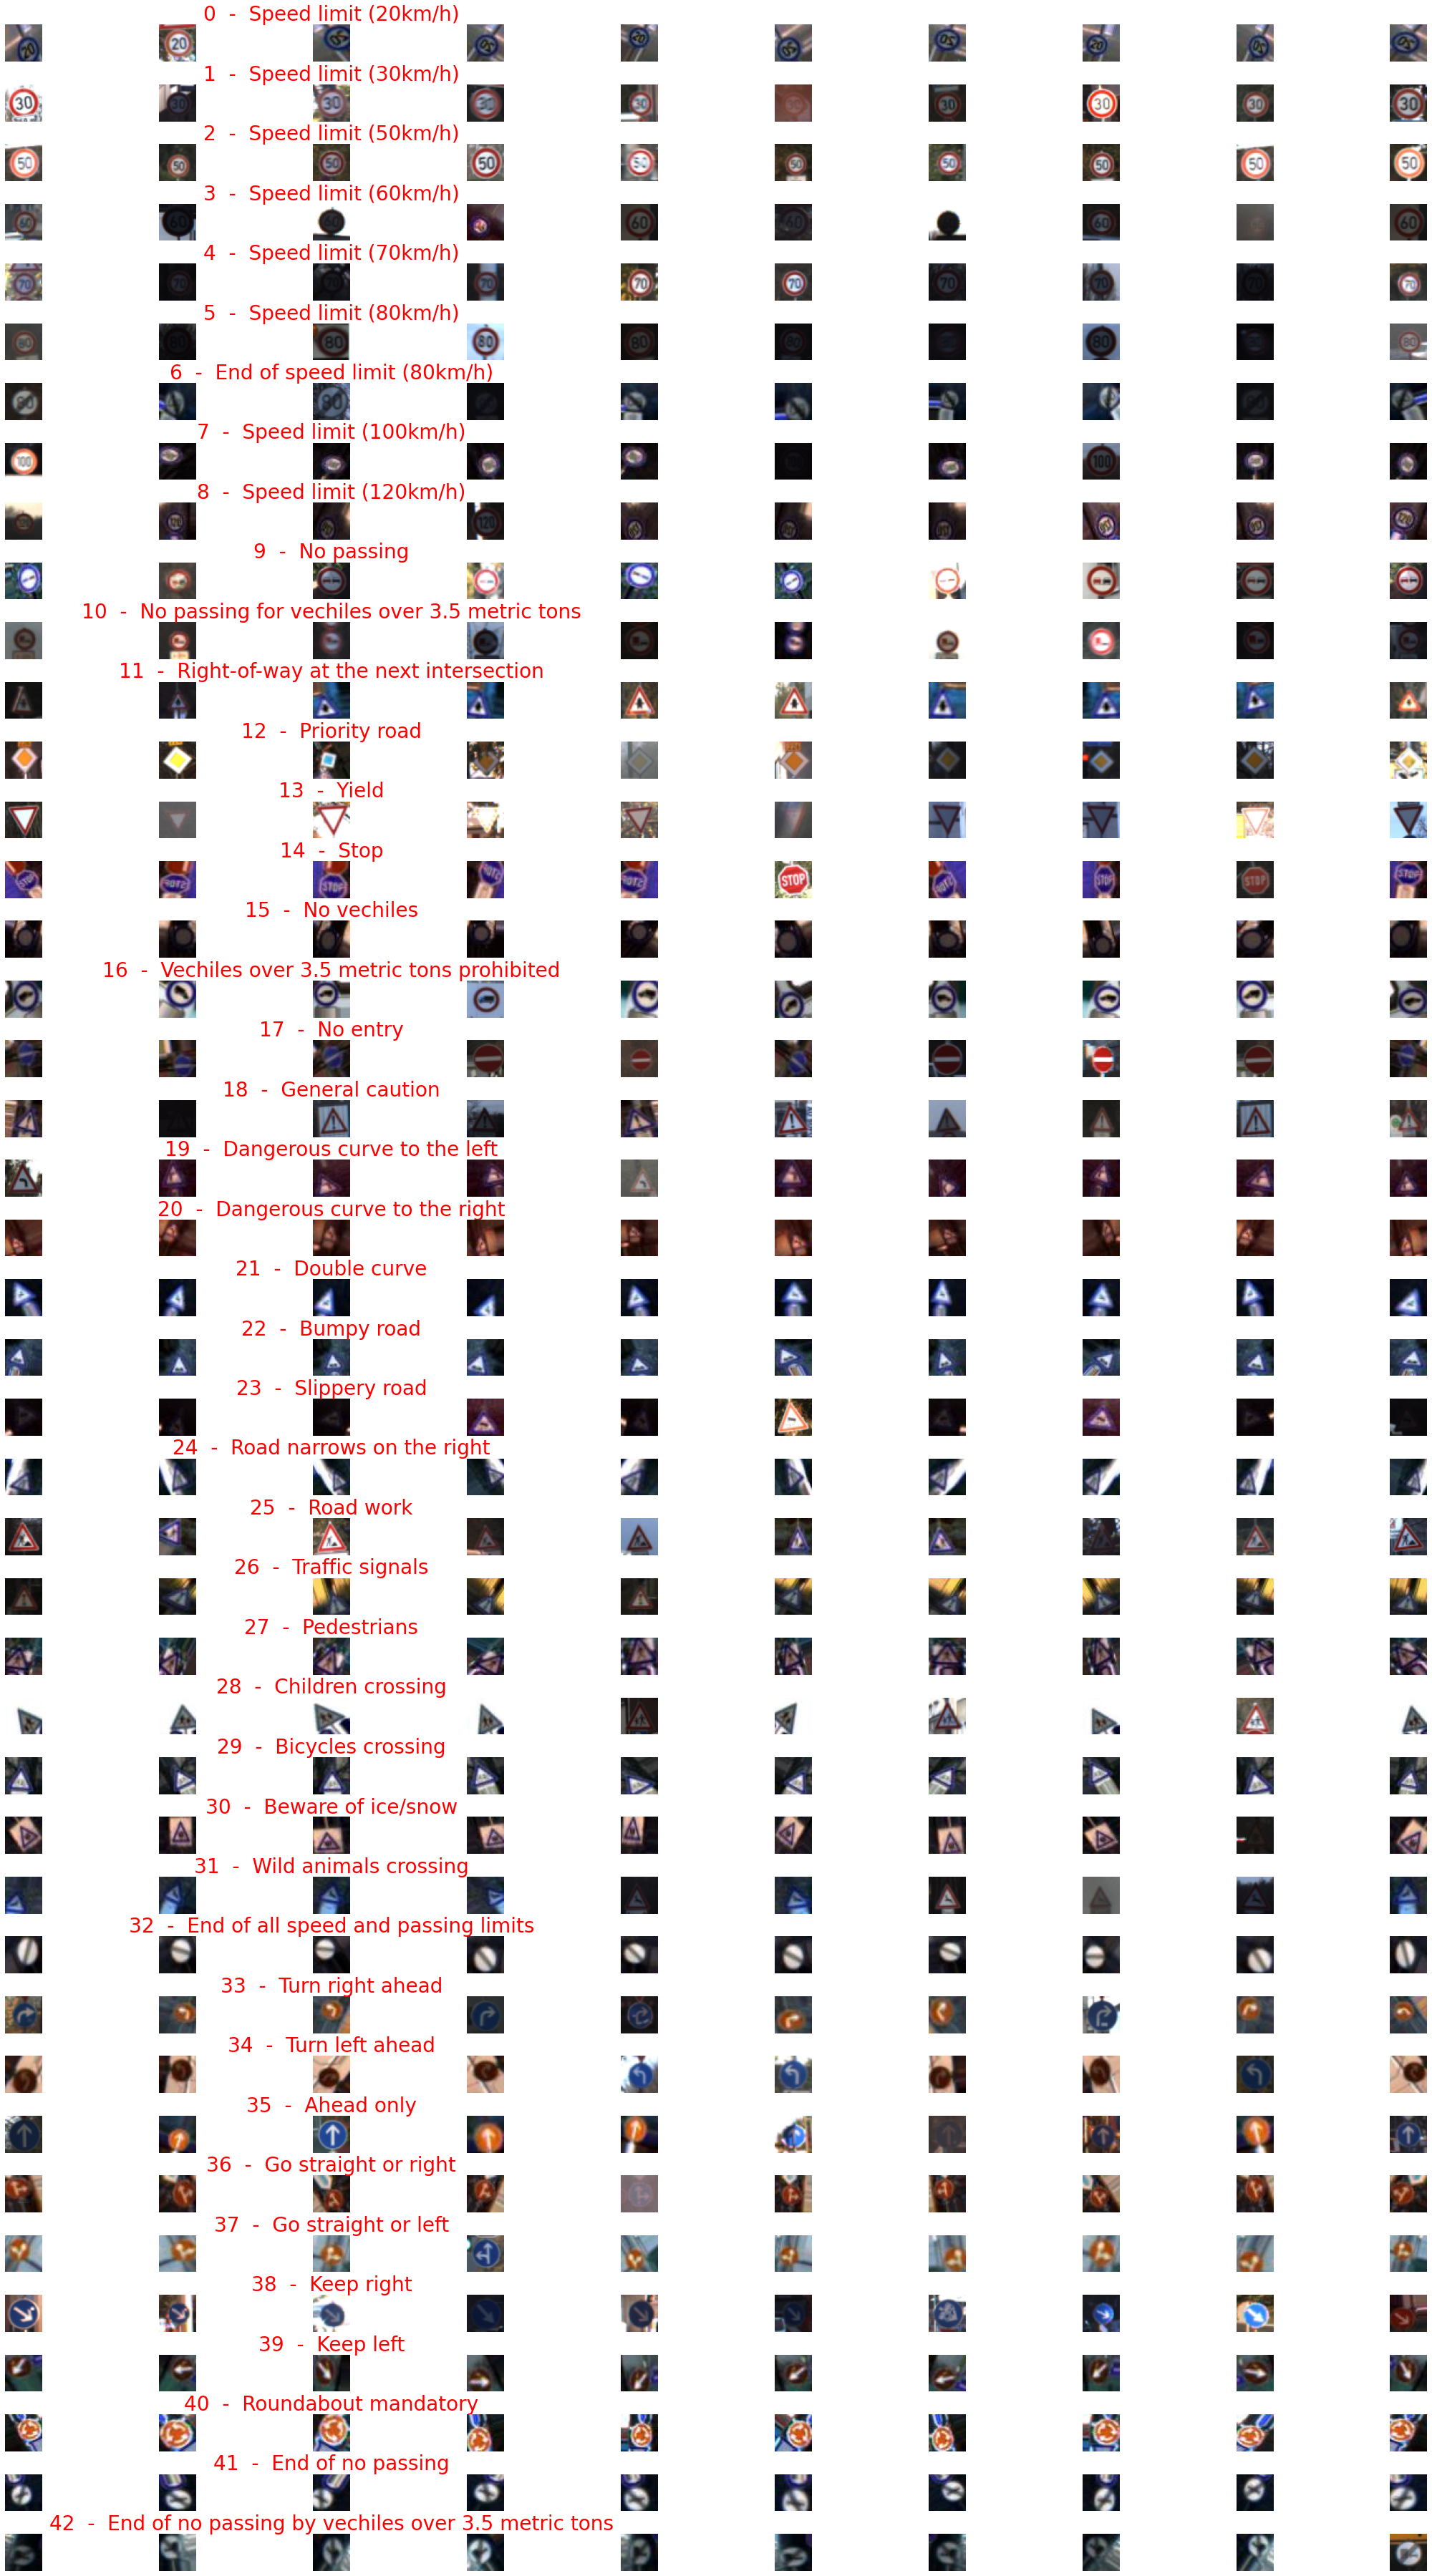

In [11]:
num_of_samples = []
cols = 10  # USTALAMY ILE CHCEMY WYSWIETLIC ZDJĘĆ Z DANEJ KLASY NIE MNIEJ NIŻ 2
num_classes = noOfClasses # ZMIENNA noOfClasses PRZENOSI INFORMACJE O ILOŚCI KLAS
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(30, 50))  # FIG - ZDJECIA; AXS-LABELS; figsize(x,y) x = cols
fig.tight_layout()  # automatycznie dostosowuje parametry podrzędnych wykresów, tak aby podwykresy pasowały do obszaru figury.
for i in range(cols): # ile obrazków chcemy wczyrać tyle razy pętla zadziała
    for j, row in data.iterrows(): # Iterate over DataFrame rows as (index, Series) pairs.
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("YlOrRd"))
        axs[j][i].axis("off") #Turn off axis lines and labels.
        if i == 2:
            axs[j][i].set_title((str(j) + "  -  " + row["Name"]),loc='center', fontsize=28, color='r') # odpowiada za opisy zdjęć
            num_of_samples.append(len(x_selected))


### Display a bar chart showing no of samples for each category (Wykres słupkowy pokazujący liczbę próbek dla każdej kategorii)

[1959, 1291, 1325, 1258, 1260, 1294, 1797, 1285, 1254, 1259, 1314, 1271, 1297, 1319, 1547, 1689, 1807, 1265, 1243, 1902, 1911, 1870, 1785, 1726, 1874, 1283, 1639, 1950, 1741, 1932, 1765, 1527, 1961, 1624, 1839, 1263, 1862, 1981, 1282, 1827, 1851, 1883, 1971]


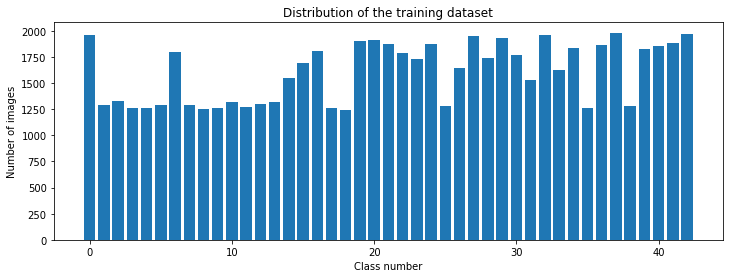

In [14]:
############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


## Trenujemy Model na danych początkowych Dataset nie jest zbalansowany

In [15]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)  # CONVERT TO GRAYSCALE
    img = equalize(img)  # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img / 255  # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img


X_train = np.array(list(map(preprocessing, X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))
# poniższy zapis działa zależnie od humoru google colab
cv2.imshow("GrayScale Images",
           X_train[random.randint(0, len(X_train) - 1)])  

In [16]:
############################### ADD A DEPTH OF 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [17]:
############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range=0.1,
                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,
                       batch_size=50)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch, y_batch = next(batches)

### TO SHOW AGMENTED IMAGE SAMPLES

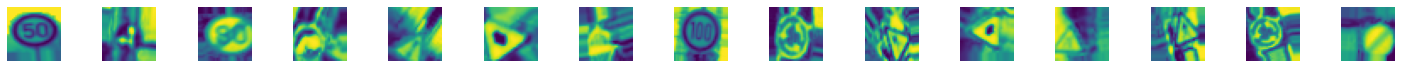

In [18]:

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    axs[i].axis('off')
plt.show()

y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

#### CONVOLUTION NEURAL NETWORK MODEL

In [19]:
def myModel():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)  # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
    # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500  # NO. OF NODES IN HIDDEN LAYERS
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1),
                      activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))  # DOES NOT EFFECT THE DEPTH/NO OF FILTERS

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))  # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses, activation='softmax'))  # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### TRAIN OUR MODEL ####
##### If You train model on CPU, now You have plenty of free time. I thing about 5 hours. Go to Google Colab and train model on GPU

In [20]:
model = myModel()
print(model.summary())
history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val),epochs=epochs_val,
                              validation_data=(X_validation, y_validation), shuffle=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

KeyboardInterrupt: 

#### PLOT GRAPHIC REPRESENTATION OF THE LEARNING RESULTS OF OUR MODEL

In [ ]:

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(Image_test, label_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

#### STORE THE MODEL AS A KERAS OBJECT 

In [ ]:

keras.models.save_model(model, "c:/Users/Stranger_inc/Downloads/!!!PROJEKT!!!/my_model_30_epok_nzb.hdf5")

cv2.waitKey(0)


#### IMAGE DATA GENERATOR  - ma na celu zbalansować nasze dane wejściowe

In [22]:
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
# Image_train = ARRAY OF IMAGES TO TRAIN
# label_train = CORRESPONDING CLASS ID

In [23]:
num_of_samples = []
for idx, _ in data.iterrows():
    x_selected = X_train[np.where(y_train == idx)]
    num_of_samples.append(len(x_selected))
print(num_of_samples)

[1959, 1291, 1325, 1258, 1260, 1294, 1797, 1285, 1254, 1259, 1314, 1271, 1297, 1319, 1547, 1689, 1807, 1265, 1243, 1902, 1911, 1870, 1785, 1726, 1874, 1283, 1639, 1950, 1741, 1932, 1765, 1527, 1961, 1624, 1839, 1263, 1862, 1981, 1282, 1827, 1851, 1883, 1971, 1920, 1261, 1280, 1251, 1291, 1250, 1796, 1289, 1282, 1291, 1282, 1264, 1277, 1311, 1490, 1673, 1798, 1283, 1313, 1916, 1931, 1917, 1846, 1719, 1884, 1272, 1640, 1945, 1712, 1867, 1775, 1522, 1916, 1657, 1830, 1248, 1830, 1988, 1305, 1856, 1874, 1925, 2006]


In [24]:
MAX_NUM_OF_SAMPLES = max(num_of_samples)
print(MAX_NUM_OF_SAMPLES)

2006


Image Data Generator wraz z zadanymi parametrami pracy


In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
test_images = []
size_of_labels = []

for i in range(0, len(myList)):
    pic_list = os.listdir(path + "/" + str(i)) # 0, 1, 2, 3 ...
    size_of_labels.append(len(pic_list))
    for idx in pic_list:
        cur_img = cv2.imread(path + '/' + str(i) + '/' + idx)
        test_images.append(cur_img)
        break

Podajemy ścieżkę dostępu do naszych danych MyData 

Wersja dla Google Colab

> należy podać dokładną ścieżkę do myData na dysku google



In [ ]:
dir_path = r'drive/MyDrive/myData/myData1'

Wersja dla Środowiska lokalnego

> należy podać dokładną ścieżkę do myData na dysku naszego komputera


In [ ]:
dir_path = r'c:/Users/Stranger_inc/Downloads/!!!PROJEKT!!!/myData2'

In [ ]:
# num_of_samples = []
for idx, pic in enumerate(test_images):
    # pick an image to transform
    test_img = pic
    img = image.img_to_array(test_img)  # convert image to numpy arry
    img = img.reshape((1,) + img.shape)  # reshape imag
    for batch in datagen.flow(img, save_to_dir= dir_path + f'\{idx}', save_prefix='test_image', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
        size_of_labels[idx] += 1
        if size_of_labels[idx] >= MAX_NUM_OF_SAMPLES: 
            break

### Ponowne Wczytanie danych w celu sprawdzenia jak wyszła zbalansowanie naszych danych


In [ ]:
############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(dir_path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(dir_path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(dir_path + "/" + str(count) + "/" + y)
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

### Split Data (Podział danych na zbiór treningowy, testowy i walidacyjny)
#### Podział został przypisany do nowych zmiennych w celu umozliwienia wytrenowania 2 modeli na danych niezbalansowanych i na tych po zbalansowaniu przez nasz Image Data Generator

In [ ]:
############################### Split Data
Image_train1, Image_test1, label_train1, label_test1 = train_test_split(images, classNo, test_size=testRatio)
Image_train1, Image_validation1, label_train1, label_validation1 = train_test_split(Image_train1, label_train1, test_size=validationRatio)

# Image_train1 = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

### Display some samples images of all the classes (Wyświetlenie niektórych próbek zdjęć wszystkich klas)


In [ ]:
############################### SPRAWDZAMY, CZY LICZBA OBRAZÓW JEST ZGODNA Z LICZBĄ ETYKIET DLA KAŻDEGO ZBIORU DANYCH
print("Data Shapes")
print('All Data Sets:', len(images))
print("Train", end="");
print(Image_train1.shape, label_train1.shape)
print("Validation", end="");
print(Image_validation1.shape, label_validation1.shape)
print("Test", end="");
print(Image_test1.shape, label_test1.shape)
assert (Image_train1.shape[0] == label_train1.shape[0]), "Liczba obrazów nie jest równa liczbie etykiet w zestawie uczącym"
assert (Image_validation1.shape[0] == label_validation1.shape[0]), "Liczba obrazów nie jest równa liczbie etykiet w zestawie walidacyjnym"
assert (Image_test1.shape[0] == label_test1.shape[0]), "Liczba obrazów nie jest równa liczbie etykiet w zestawie testowym"
assert (Image_train1.shape[1:] == (imageDimesions)), " Wymiary obrazów szkoleniowych są nieprawidłowe"
assert (Image_validation1.shape[1:] == (imageDimesions)), " Wymiary obrazów walidacji są nieprawidłowe "
assert (Image_test1.shape[1:] == (imageDimesions)), "Wymiary obrazów testowych są nieprawidłowe "


### Read csv file (Wczytanie pliku z etykietami)

In [ ]:
############################### WCZYTUJEMY PLIK CSV SPRAWDZAMY JEGO KSZTAŁT I RODZAJ
data1 = pd.read_csv(labelFile)  # we read our labels
print("data shape ", data1.shape, type(data1))  # Wyświetlamy jak wygląda nasz Label files ( 43 klasy i 2 obiekty)


### Display some samples images of all the classes (Wyświetlenie niektórych próbek zdjęć wszystkich klas)

In [ ]:
num_of_samples = []
cols = 10  # USTALAMY ILE CHCEMY WYSWIETLIC ZDJĘĆ Z DANEJ KLASY
num_classes = noOfClasses # ZMIENNA noOfClasses PRZENOSI INFORMACJE O ILOŚCI KLAS
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(30, 50))  # FIG - ZDJECIA; AXS-LABELS; figsize(x,y) x = cols
fig.tight_layout()  # automatycznie dostosowuje parametry podrzędnych wykresów, tak aby podwykresy pasowały do obszaru figury.
for i in range(cols): # ile obrazków chcemy wczyrać tyle razy pętla zadziała
    for j, row in data.iterrows(): # Iterate over DataFrame rows as (index, Series) pairs.
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("YlOrRd"))
        axs[j][i].axis("off") #Turn off axis lines and labels.
        if i == 2:
            axs[j][i].set_title((str(j) + "  -  " + row["Name"]),loc='center', fontsize=28, color='r') # odpowiada za opisy zdjęć
            num_of_samples.append(len(x_selected))


### Display a bar chart showing no of samples for each category (Wykres słupkowy pokazujący liczbę próbek dla każdej kategorii)

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


## Trenujemy Model w którym dataset jest juz zbalansowany

In [ ]:

############################### PREPROCESSING THE IMAGES

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)  # CONVERT TO GRAYSCALE
    img = equalize(img)  # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img / 255  # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img


Image_train1 = np.array(list(map(preprocessing, Image_train1)))  # TO IRETATE AND PREPROCESS ALL IMAGES
Image_validation1 = np.array(list(map(preprocessing, Image_validation1)))
Image_test1 = np.array(list(map(preprocessing, Image_test1)))
cv2.imshow("GrayScale Images",
           Image_train1[random.randint(0, len(Image_train1) - 1)])  # TO CHECK IF THE TRAINING IS DONE PROPERLY

############################### ADD A DEPTH OF 1
Image_train1 = Image_train1.reshape(Image_train1.shape[0], Image_train1.shape[1], Image_train1.shape[2], 1)
Image_validation1 = Image_validation1.reshape(Image_validation1.shape[0], Image_validation1.shape[1], Image_validation1.shape[2], 1)
Image_test1 = Image_test1.reshape(Image_test1.shape[0], Image_test1.shape[1], Image_test1.shape[2], 1)

############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range=0.1,
                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10)  # DEGREES
dataGen.fit(Image_train1)
batches = dataGen.flow(Image_train1, label_train1,
                       batch_size=32)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch, y_batch = next(batches)

# TO SHOW AGMENTED IMAGE SAMPLES
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    axs[i].axis('off')
plt.show()

label_train1 = to_categorical(label_train1, noOfClasses)
label_validation1 = to_categorical(label_validation1, noOfClasses)
label_test1 = to_categorical(label_test1, noOfClasses)


############################### CONVOLUTION NEURAL NETWORK MODEL
def myModel():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)  # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
    # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500  # NO. OF NODES IN HIDDEN LAYERS
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1),
                      activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))  # DOES NOT EFFECT THE DEPTH/NO OF FILTERS

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))  # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses, activation='softmax'))  # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


############################### TRAIN
model = myModel()
print(model.summary())
history = model.fit(dataGen.flow(Image_train1, label_train1, batch_size=batch_size_val), epochs=epochs_val,
                    validation_data=(Image_validation1, label_validation1), shuffle=1)

############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(Image_test1, label_test1, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

# STORE THE MODEL AS A PICKLE OBJECT
keras.models.save_model(model, "c:/Users/Stranger_inc/Downloads/!!!PROJEKT!!!/my_model_30_epok_zb.hdf5")

cv2.waitKey(0)


### Tą część należy uruchamiać w środowisku lokalnym 
#### Do poprawnego działania wymagana jest kamerka 
#### Jeśli po uruchomieni zgłasza błąd "img = cv2.resize" sprawdz czy kamera nie jest uzywana przez inny proces

#### Importujemy niezbedne biblioteki

In [ ]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#### Uruchamiamy naszą kamerę

In [ ]:
#############################################
frameWidth = 640  # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.80  # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# IMPORT THE TRANNIED MODEL

### Wybierz który model chcesz uzyć
### Wczytujemy nasz wytrenowany model na danych niezabalansowanych

In [ ]:
model = tf.keras.models.load_model("c:/Users/Stranger_inc/Downloads/!!!PROJEKT!!!/my_model_30_epoch.hdf5")
model.summary()

### Wczytujemy nasz wytrenowany model na danych zabalansowanych

In [ ]:
model = tf.keras.models.load_model("c:/Users/Stranger_inc/Downloads/!!!PROJEKT!!!/my_model_30_epok_zb.hdf5")
model.summary()

### Image Preprocesing  - obrabiamy nasz obraz

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return img

def equalize(img):
    img = cv2.equalizeHist(img)

    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255

    return img


### Wczytujemy nazwy naszych klas niezbedne do poprawnego opisu rozpoznawanego znaku drogowego

In [ ]:
def getCalssName(classNo):
    if classNo == 0:
        return 'Speed Limit 20 km/h'
    elif classNo == 1:
        return 'Speed Limit 30 km/h'
    elif classNo == 2:
        return 'Speed Limit 50 km/h'
    elif classNo == 3:
        return 'Speed Limit 60 km/h'
    elif classNo == 4:
        return 'Speed Limit 70 km/h'
    elif classNo == 5:
        return 'Speed Limit 80 km/h'
    elif classNo == 6:
        return 'End of Speed Limit 80 km/h'
    elif classNo == 7:
        return 'Speed Limit 100 km/h'
    elif classNo == 8:
        return 'Speed Limit 120 km/h'
    elif classNo == 9:
        return 'No passing'
    elif classNo == 10:
        return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11:
        return 'Right-of-way at the next intersection'
    elif classNo == 12:
        return 'Priority road'
    elif classNo == 13:
        return 'Yield'
    elif classNo == 14:
        return 'Stop'
    elif classNo == 15:
        return 'No vechiles'
    elif classNo == 16:
        return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17:
        return 'No entry'
    elif classNo == 18:
        return 'General caution'
    elif classNo == 19:
        return 'Dangerous curve to the left'
    elif classNo == 20:
        return 'Dangerous curve to the right'
    elif classNo == 21:
        return 'Double curve'
    elif classNo == 22:
        return 'Bumpy road'
    elif classNo == 23:
        return 'Slippery road'
    elif classNo == 24:
        return 'Road narrows on the right'
    elif classNo == 25:
        return 'Road work'
    elif classNo == 26:
        return 'Traffic signals'
    elif classNo == 27:
        return 'Pedestrians'
    elif classNo == 28:
        return 'Children crossing'
    elif classNo == 29:
        return 'Bicycles crossing'
    elif classNo == 30:
        return 'Beware of ice/snow'
    elif classNo == 31:
        return 'Wild animals crossing'
    elif classNo == 32:
        return 'End of all speed and passing limits'
    elif classNo == 33:
        return 'Turn right ahead'
    elif classNo == 34:
        return 'Turn left ahead'
    elif classNo == 35:
        return 'Ahead only'
    elif classNo == 36:
        return 'Go straight or right'
    elif classNo == 37:
        return 'Go straight or left'
    elif classNo == 38:
        return 'Keep right'
    elif classNo == 39:
        return 'Keep left'
    elif classNo == 40:
        return 'Roundabout mandatory'
    elif classNo == 41:
        return 'End of no passing'
    elif classNo == 42:
        return 'End of no passing by vechiles over 3.5 metric tons'


In [ ]:
while True:

    # READ IMAGE
    success, imgOrignal = cap.read()

    # PROCESS IMAGE
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: ", (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

    # PREDICT IMAGE
    predictions = model.predict(img)
    classIndex = np.argmax(predictions, axis=1)
    # classIndex = model.predict_classes(img)
    probabilityValue = np.amax(predictions)
    if probabilityValue > threshold:
        print(getCalssName(classIndex))
        cv2.putText(imgOrignal, str(classIndex) + " " + str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2,                    cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue * 100, 2)) + "%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)
    # System umożliwiający zakończenie działania programu.
    if cv2.waitKey(1) & 0b11111111 == ord('q'):
        cv2.destroyAllWindows()
        cap.release()
        break
